<a href="https://colab.research.google.com/github/Siddhu44-DS/Data-Analyst-Portfolio/blob/main/Business_Case_Aerofit_Descriptive_Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Business Case: Aerofit - Descriptive Statistics & Probability**

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.






In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 15.4MB/s]


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('aerofit.csv')

In [ ]:
# Displaying first few Rows of Data
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Displaying from last few Rows of Data
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Shape of Dataset
df.shape

(180, 9)

In [ ]:
# Data types of attributes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights**

The Dataset Consist of 180 Enrties and 9 attributes

*   No missing values in data
*   Data is mixed with alpha numeric data
*   Changing Datatype of Usage and Fitness into str(object)

In [ ]:
#Changing Datatype of Usage and Fitness into str(object)
df['Usage'] = df['Usage'].astype('str')
df['Fitness'] = df['Fitness'].astype('str')
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage            object
Fitness          object
Income            int64
Miles             int64
dtype: object

In [ ]:
# statisctical summary of numerical data type columns
df.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


**Insights**
1. Age - The age range of customers spans from 18 to 50 year, with an average age of 29 years.

2. Education - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.

3. Usage - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.

4. Fitness - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.

5. Income - The annual income of customers falls within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.

6. Miles - Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

In [ ]:
#Duplicate Detection
df.duplicated().value_counts()

False    180
dtype: int64

There are no Dublicates

**Adding new columns**
**Age Column**

Categorizing the values in age column in 4 different buckets:

Young Adult: from 18 - 25

Adults: from 26 - 35

Middle Aged Adults: 36-45

Elder :46 and above


**Education Column**

Categorizing the values in education column in 3 different buckets:

Primary Education: upto 12

Secondary Education: 13 to 15

Higher Education: 16 and above

**Income Column**

Categorizing the values in Income column in 4 different buckets:
Low Income - Upto 40,000

Moderate Income - 40,000 to 60,000

High Income - 60,000 to 80,000

Very High Income - Above 80,000

**Miles column**

Categorizing the values in miles column in 4 different buckets:

Light Activity - Upto 50 miles

Moderate Activity - 51 to 100 miles

Active Lifestyle - 101 to 200 miles

Fitness Enthusiast - Above 200 miles

In [ ]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)

#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


In [ ]:
#statisctical summary of object type columns
df.describe(include = 'object')

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,KP281,Male,Partnered,3,3
freq,80,104,107,69,97


[]

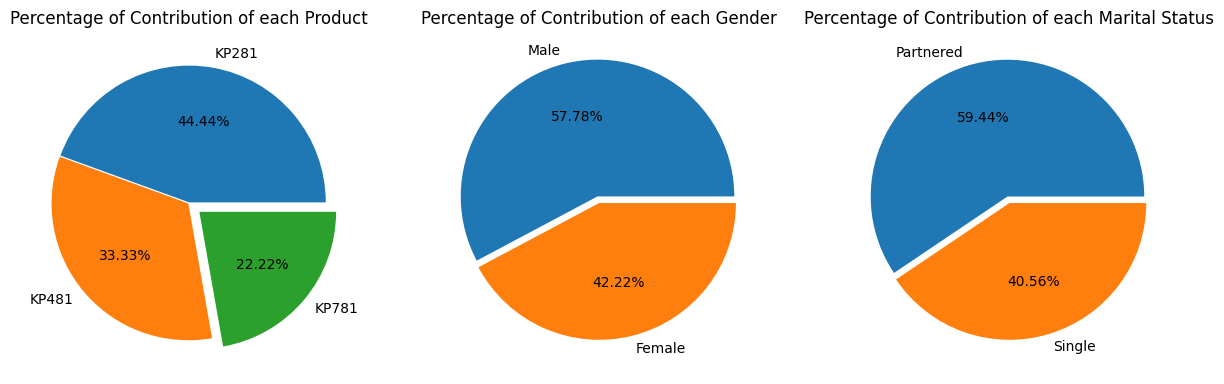

In [ ]:

prod_dist = np.round(df['Product'].value_counts(normalize = True) * 100, 2).to_frame()
plt.figure(figsize = (15, 30))
plt.subplot(1, 3, 1)
plt.title('Percentage of Contribution of each Product')
plt.pie(x = prod_dist['Product'], explode = [0.005, 0.005, 0.1], labels = prod_dist.index, autopct = '%.2f%%')


gender_dist = (np.round(df['Gender'].value_counts(normalize = True) * 100, 2)).to_frame()
plt.subplot(1, 3, 2)
plt.title('Percentage of Contribution of each Gender')
plt.pie(x = gender_dist['Gender'], explode = [0.05, 0],
        labels = gender_dist.index, autopct = '%.2f%%')


marital_status_dist = (np.round(df['MaritalStatus'].value_counts(normalize = True) * 100, 2)).to_frame()
plt.subplot(1, 3, 3)
plt.title('Percentage of Contribution of each Marital Status')
plt.pie(x = marital_status_dist['MaritalStatus'], explode = [0.05, 0],
        labels = marital_status_dist.index, autopct = '%.2f%%')
plt.plot()

**Insights**

1. Product - Over the past three months, the KP281 product has the highest sales and having 44% of total sales.

2. Gender - Based on the data of last 3 months, around 58% of the buyers were Male and 42% are female

3. Marital Status - Based on the data of last 3 months, around 60% of the buyers were Married and 40% were single

**Univariate Analysis:**

[]

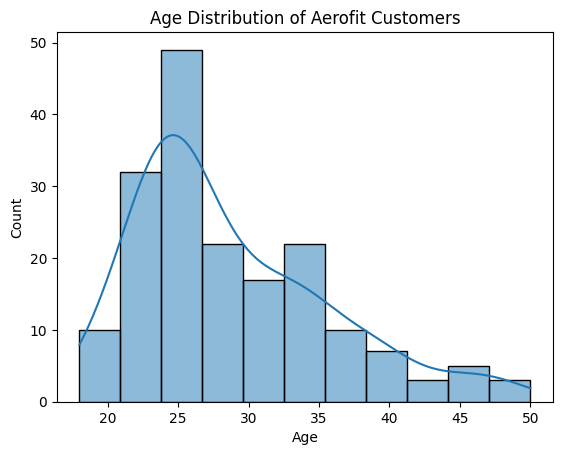

In [ ]:
#How are the ages of the Aerofit Customers distributed ?
plt.figure()
sns.histplot(data = df, x = 'Age', kde = True)
plt.title('Age Distribution of Aerofit Customers')
plt.plot()

**Insights**

Most of The Cutomers are between 20-35 age is about 80% of Customers

[]

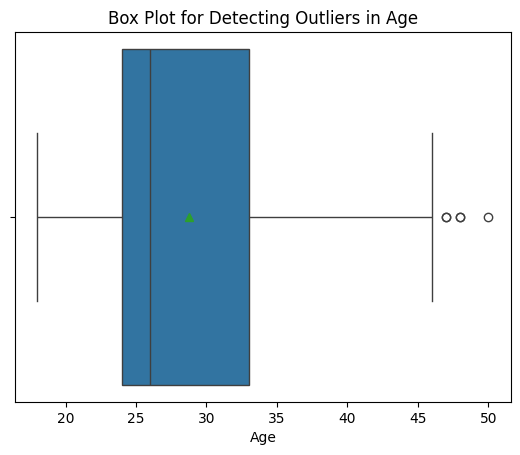

In [ ]:
#Detecting outliers in age data for aerofit customers

sns.boxplot(data = df['Age'], width = 0.5, orient = 'h', showmeans = True)
plt.title('Box Plot for Detecting Outliers in Age')
plt.plot()

As we can see from the box plot, there are 3 outlier's present in the age data

In [ ]:
data = df['Age']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  28.788888888888888
Median :  26.0
1st Quartile :  24.0
3rd Quartile :  33.0
Innerquartile Range :  9.0
Upper Bound :  46.5
Lower Bound :  10.5
Outliers :  [47, 47, 48, 48, 50]
No of Outliers :  5


**Customer Age Distribution**

<ipython-input-69-f2a9692f2435>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(temp.index, fontweight='bold')


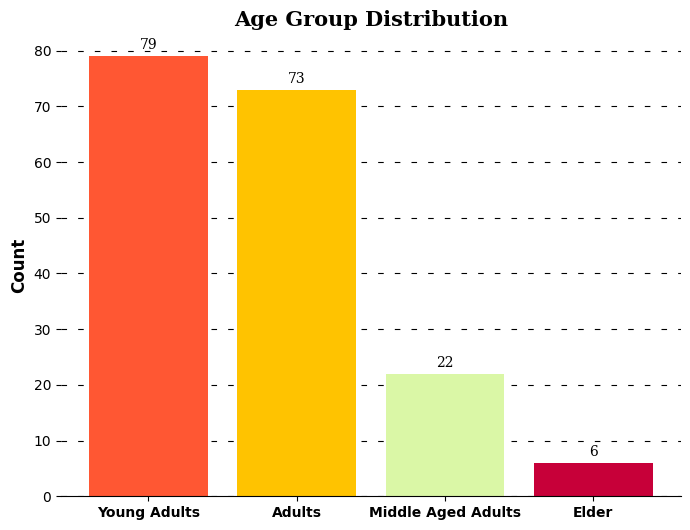

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

temp = df['age_group'].value_counts()
color_map = ["#FF5733", "#FFC300", '#DAF7A6', '#C70039']  # Different color codes
plt.bar(x=temp.index, height=temp.values, color=color_map, zorder=2)

for i in temp.index:
    plt.text(i, temp[i] + 2, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

plt.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

for s in ['top', 'left', 'right']:
    plt.gca().spines[s].set_visible(False)

plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.gca().set_xticklabels(temp.index, fontweight='bold')

plt.title('Age Group Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()

In [ ]:
#Sample Calculation for Age between 20-35
result = df[(df["Age"] >= 18) & (df['Age'] <= 35)]['Product'].count() / len(df) * 100
"%% of customers whose age is between 20 and 35 is %.2f%%"%(result)

'% of customers whose age is between 20 and 35 is 84.44%'

Insights: Most of the customers are Young Adults and Adults

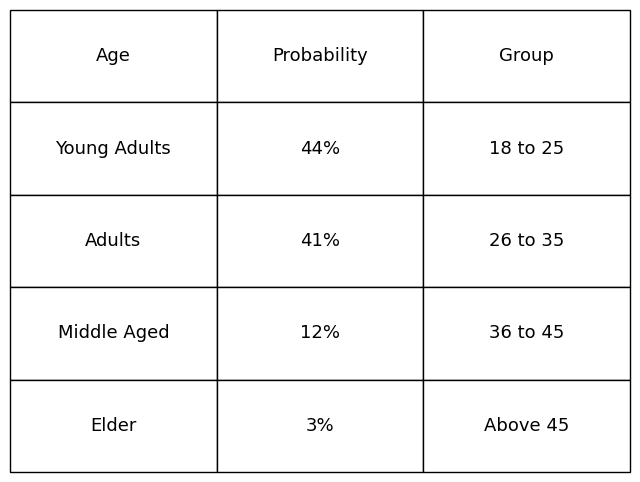

In [ ]:
plt.figure(figsize=(8, 6))

age_info = [['Young Adults', '44%', '18 to 25'], ['Adults', '41%', '26 to 35'], ['Middle Aged', '12%', '36 to 45'],
            ['Elder', '3%', 'Above 45']]

table = plt.table(cellText=age_info, cellLoc='center', colLabels=['Age', 'Probability', 'Group'], colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(13)
plt.axis('off')

plt.show()

**Customer Education Distribution**

<ipython-input-72-5d9f5c702751>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(temp.index, fontweight='bold', rotation=7)


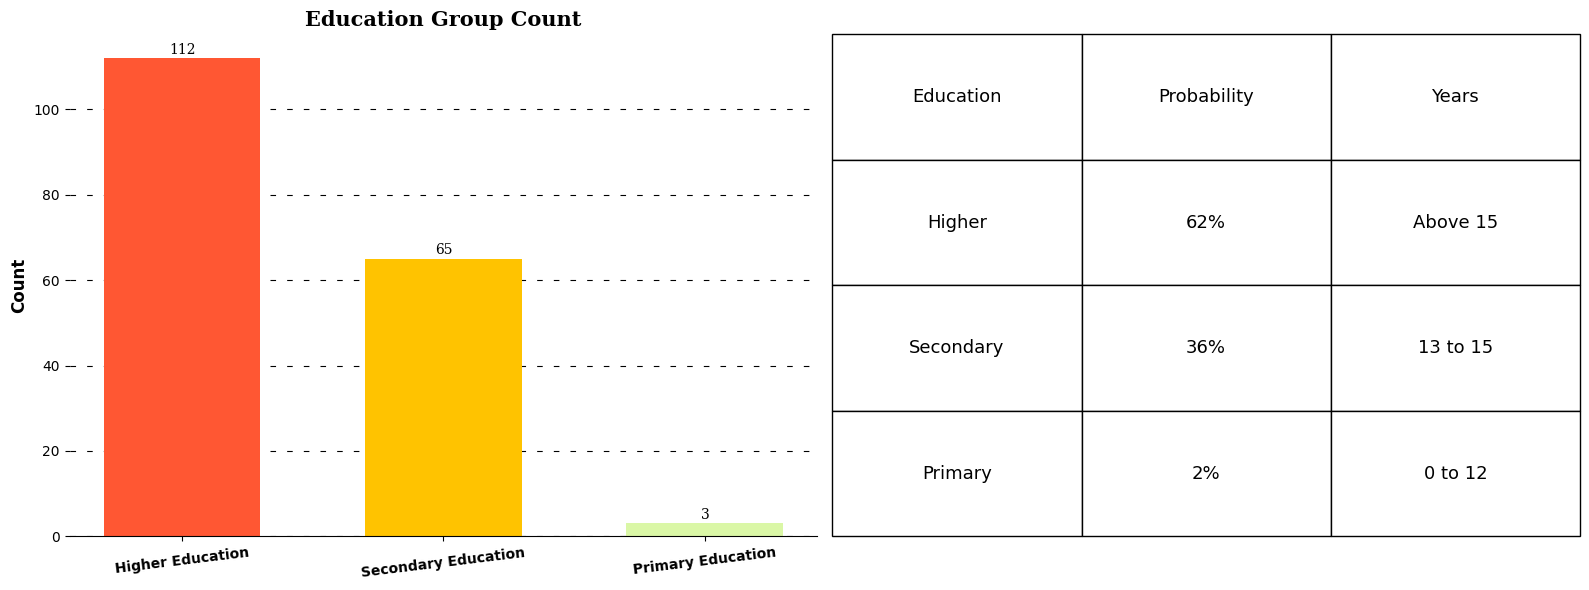

In [ ]:

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for Education Group Count
temp = df['edu_group'].value_counts()
color_map = ["#FF5733", "#FFC300", '#DAF7A6']
axes[0].bar(x=temp.index, height=temp.values, color=color_map, zorder=2, width=0.6)

for i in temp.index:
    axes[0].text(i, temp[i] + 2, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

axes[0].grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

for s in ['top', 'left', 'right']:
    axes[0].spines[s].set_visible(False)

axes[0].set_ylabel('Count', fontweight='bold', fontsize=12)
axes[0].set_xticklabels(temp.index, fontweight='bold', rotation=7)
axes[0].set_title('Education Group Count', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Table for Education Group Info
edu_info = [['Higher', '62%', 'Above 15'], ['Secondary', '36%', '13 to 15'], ['Primary', '2%', '0 to 12']]
table = axes[1].table(cellText=edu_info, cellLoc='center', colLabels=['Education', 'Probability', 'Years'],
                      colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(13)
axes[1].axis('off')

plt.tight_layout()
plt.show()

**Insights**

98% of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products. It's plausible that health awareness driven by education could play a pivotal role in this trend.

**Customer Income Distribution**

<ipython-input-73-669507804225>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(temp.index, fontweight='bold', rotation=9)


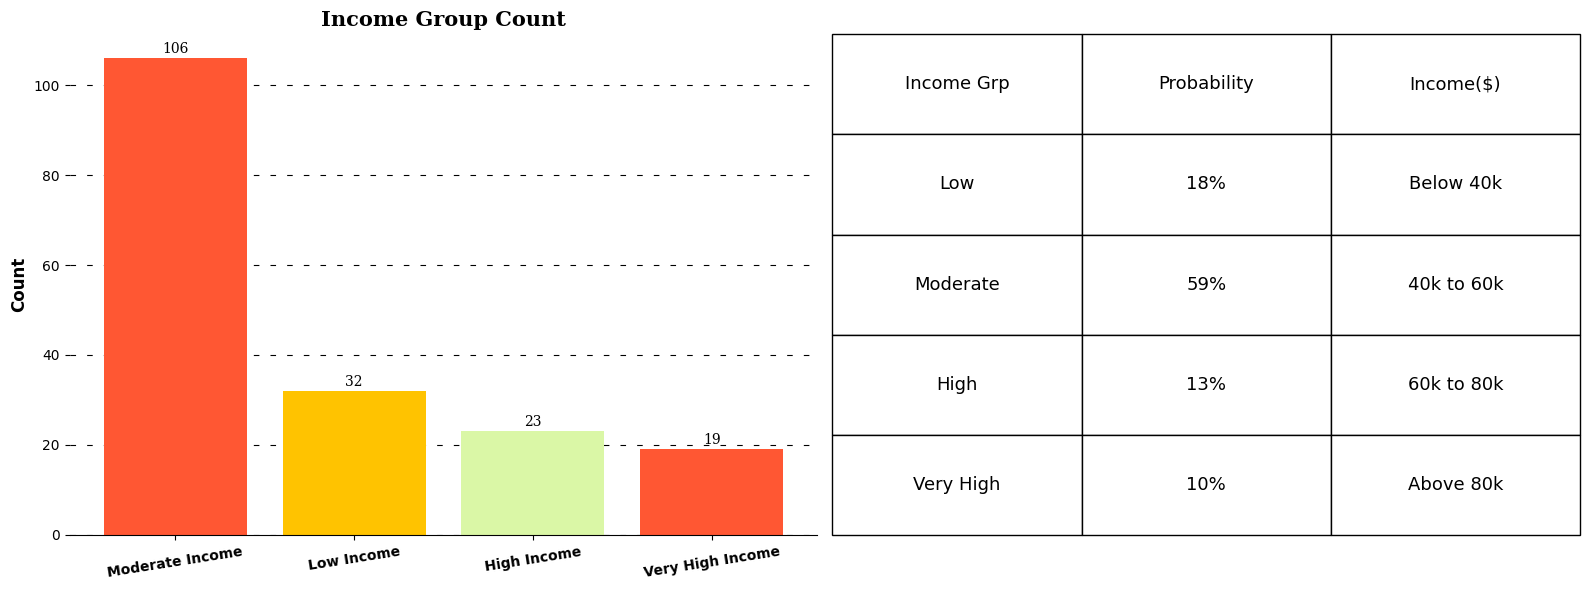

In [ ]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Bar chart for Income Group Count
temp = df['income_group'].value_counts()
color_map =  ["#FF5733", "#FFC300", '#DAF7A6']
axes[0].bar(x=temp.index, height=temp.values, color=color_map, zorder=2)

for i in temp.index:
    axes[0].text(i, temp[i] + 2, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

axes[0].grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

for s in ['top', 'left', 'right']:
    axes[0].spines[s].set_visible(False)

axes[0].set_ylabel('Count', fontweight='bold', fontsize=12)
axes[0].set_xticklabels(temp.index, fontweight='bold', rotation=9)
axes[0].set_title('Income Group Count', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Second subplot: Table for Income Group Info
inc_info = [['Low', '18%', 'Below 40k'], ['Moderate', '59%', '40k to 60k'], ['High', '13%', '60k to 80k'],
            ['Very High', '10%', 'Above 80k']]


table = axes[1].table(cellText=inc_info,  cellLoc='center', colLabels=['Income Grp', 'Probability', 'Income($)'], colLoc='center', bbox=[0, 0, 1, 1])

table.set_fontsize(13)

axes[1].axis('off')

plt.tight_layout()
plt.show()

 **Insights**

Almost 60% of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.

Surprisingly 18% of the customers fall in the income group of (<40) suggesting almost 77% of the total customers fall in income group of below 60k and only 23% of them falling in 60k and above income group




**Buyer Fitness and Treadmill Usage**

<ipython-input-74-3ba118633b31>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(temp.index, fontweight='bold')


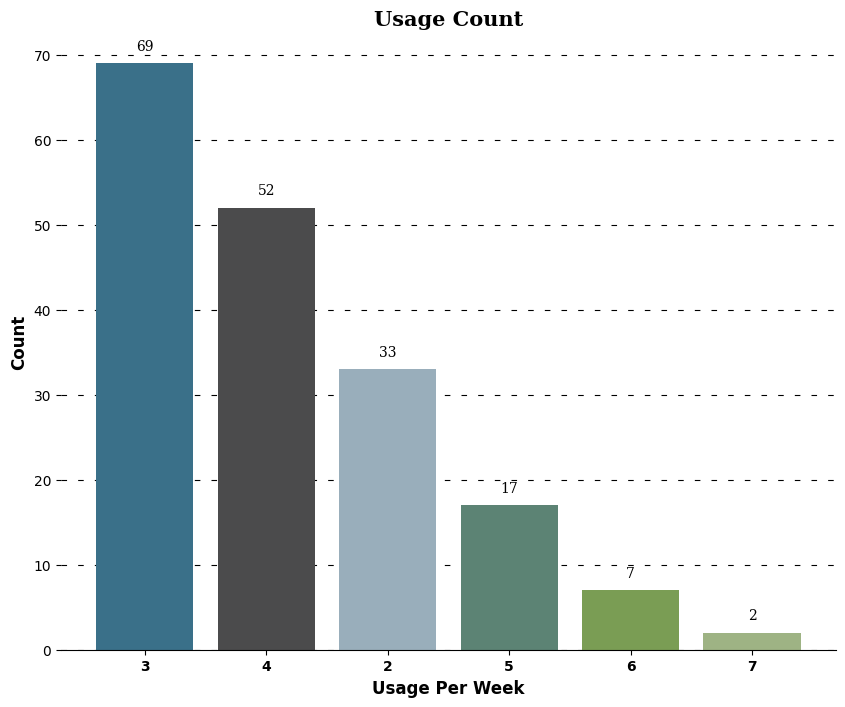

In [ ]:
#Setting the plot style
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[0.65, 0.35])

# Creating bar chart for usage distribution
ax0 = fig.add_subplot()
temp = df['Usage'].value_counts()
color_map = ["#3A7089", "#4b4b4c", '#99AEBB', '#5C8374', '#7A9D54', '#9EB384']
ax0.bar(x=temp.index, height=temp.values, color=color_map, zorder=2)

# Adding the value_counts
for i in temp.index:
    ax0.text(i, temp[i] + 2, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

# Adding grid lines
ax0.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Removing the axis lines
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

# Adding axis label
ax0.set_ylabel('Count', fontweight='bold', fontsize=12)
ax0.set_xlabel('Usage Per Week', fontweight='bold', fontsize=12)
ax0.set_xticklabels(temp.index, fontweight='bold')

# Setting title for visual
ax0.set_title('Usage Count', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Show the first subplot
plt.show()



<ipython-input-75-6acca3e1be32>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(temp.index, fontweight='bold')


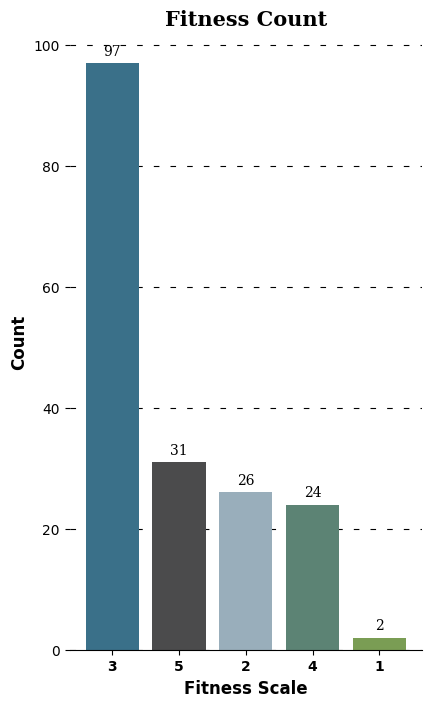

In [ ]:
#Setting the plot style
fig = plt.figure(figsize=(10, 8))

# Creating bar chart for fitness scale
ax2 = fig.add_subplot(1, 2, 2)  # We specify a grid of 1 row and 2 columns, and we place this subplot at the second position
temp = df['Fitness'].value_counts()
color_map = ["#3A7089", "#4b4b4c", '#99AEBB', '#5C8374', '#7A9D54', '#9EB384']
ax2.bar(x=temp.index, height=temp.values, color=color_map, zorder=2)

# Adding the value_counts
for i in temp.index:
    ax2.text(i, temp[i] + 2, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

# Adding grid lines
ax2.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Removing the axis lines
for s in ['top', 'left', 'right']:
    ax2.spines[s].set_visible(False)

# Adding axis label
ax2.set_ylabel('Count', fontweight='bold', fontsize=12)
ax2.set_xlabel('Fitness Scale', fontweight='bold', fontsize=12)
ax2.set_xticklabels(temp.index, fontweight='bold')

# Setting title for visual
ax2.set_title('Fitness Count', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Show the subplot
plt.show()

**Insights**

Almost 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week

54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

**Bivariate Analysis**

Product Preferences Across Age

<ipython-input-76-39a26e7ad200>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(df_grp.index, fontweight='bold')


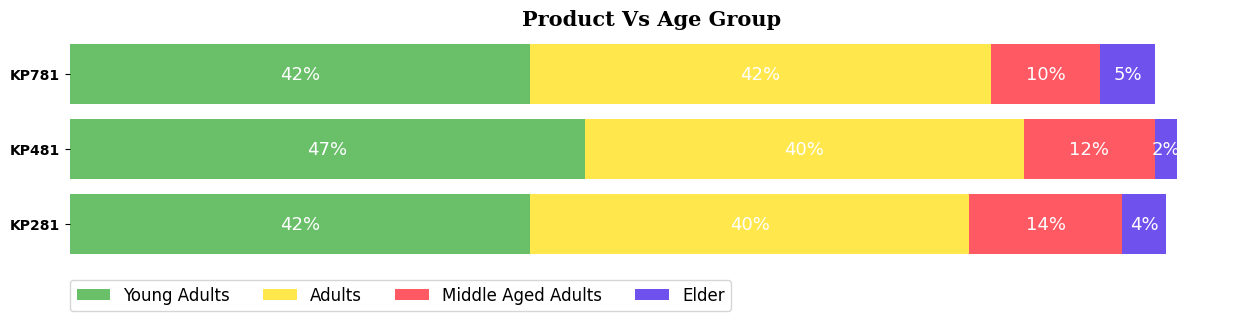

In [ ]:
#Setting the plot style
fig, ax0 = plt.subplots(figsize=(15, 3))

# Product vs age group
val = 'age_group'
df_grp = df.groupby('Product')[val].value_counts(normalize=True).round(2).unstack()

color_map = ["#6abf69", "#ffe74c", "#ff5964", "#6f52ed"]

for i, (col, color) in enumerate(zip(df_grp.columns, color_map)):
    left = df_grp.iloc[:, :i].sum(axis=1)
    ax0.barh(df_grp.index, width=df_grp[col], left=left, label=col, color=color)
    for j, val in enumerate(df_grp[col]):
        ax0.text(val / 2 + left.iloc[j], df_grp.index[j], f"{val:.0%}",
                 va='center', ha='center', fontsize=13, color='white')

# Removing the axis lines
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

# Customizing ticks
ax0.set_xticks([])
ax0.set_yticklabels(df_grp.index, fontweight='bold')

# Plot title
ax0.set_title('Product Vs Age Group', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Adding legend
ax0.legend(loc=(0, -0.2), ncol=4, fontsize=12)

plt.show()

The analysis provided above distinctly demonstrates that there exists no strong correlation between age groups and product preferences. This is evident from the nearly uniform distribution of age groups across all the products.

**Product Preference Across Income Group**

<ipython-input-77-43a955b68daf>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(df_grp.index, fontweight='bold')


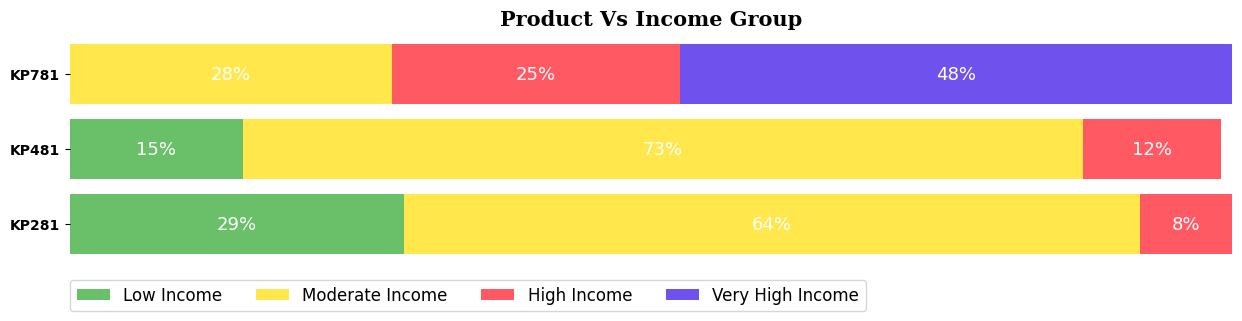

In [ ]:
# Setting the plot style
fig, ax0 = plt.subplots(figsize=(15, 3))

# Product vs income group
val = 'income_group'
df_grp = df.groupby('Product')[val].value_counts(normalize=True).round(2).unstack()

# Brighter color map
color_map = ["#6abf69", "#ffe74c", "#ff5964", "#6f52ed"]

for i, (col, color) in enumerate(zip(df_grp.columns, color_map)):
    left = df_grp.iloc[:, :i].sum(axis=1)
    ax0.barh(df_grp.index, width=df_grp[col], left=left, label=col, color=color)
    for j, val in enumerate(df_grp[col]):
        if val < 0.05:
            continue
        ax0.text(val / 2 + left.iloc[j], df_grp.index[j], f"{val:.0%}",
                 va='center', ha='center', fontsize=13, color='white')

# Removing the axis lines
for spine in ax0.spines.values():
    spine.set_visible(False)

# Customizing ticks
ax0.set_xticks([])
ax0.set_yticklabels(df_grp.index, fontweight='bold')

# Plot title
ax0.set_title('Product Vs Income Group', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Adding legend
ax0.legend(loc=(0, -0.2), ncol=4, fontsize=12)

plt.show()

Treadmill model KP781 is preferred more by customers with Very High Income

Both treadmill models, KP481 and KP281, are preferred more by customers with Moderate Income

<ipython-input-78-8b167ce464cb>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_grp.index, fontweight='bold')
<ipython-input-78-8b167ce464cb>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_grp.index, fontweight='bold')


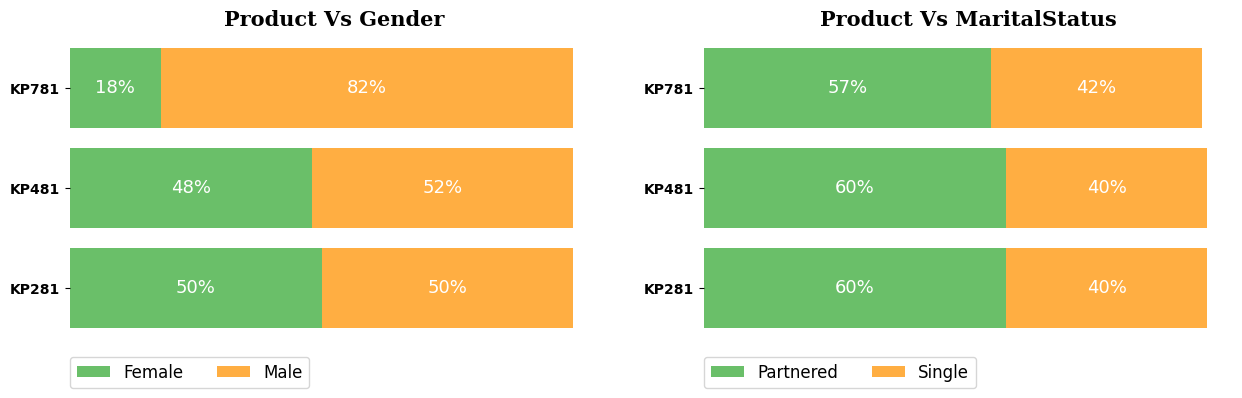

In [ ]:
# Product Preference across Gender and Marital Status
# Setting the plot style
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

for ax, val in zip(axes, ['Gender', 'MaritalStatus']):

    # Creating required df
    df_grp = df.groupby('Product')[val].value_counts(normalize=True).round(2)
    df_grp.name = 'count'
    df_grp = df_grp.reset_index()
    df_grp = df_grp.pivot(columns=val, index='Product', values='count')

    # Brighter color map excluding dark yellow
    color_map = ["#6abf69", "#ffae42"]

    # For left parameter in ax.barh
    temp = np.zeros(len(df_grp), dtype=float)

    # Plotting the visual
    for i, (col, color) in enumerate(zip(df_grp.columns, color_map)):
        ax.barh(df_grp.index, width=df_grp[col], left=temp, label=col, color=color)
        for j, k in enumerate(df_grp[col]):
            if k < 0.05:
                continue
            ax.text(k / 2 + temp[j], df_grp.index[j], f"{k:.0%}", va='center', ha='center', fontsize=13, color='white')
        temp += df_grp[col].values

    # Removing the axis lines
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Customizing ticks
    ax.set_xticks([])
    ax.set_yticklabels(df_grp.index, fontweight='bold')

    # Plot title
    ax.set_title(f'Product Vs {val}', {'font': 'serif', 'size': 15, 'weight': 'bold'})

    # Adding legend
    ax.legend(loc=(0, -0.15), ncol=2, fontsize=12)

plt.show()

**1. Gender**

Treadmill model KP781 is preferred more by male customers.

Both treadmill models, KP481 and KP281, show equal distribution of both the gender

**2. Marital Status**

For all the three treadmill models, there is uniform distribution of Married and Single customers with married customers showing slighly higher preference

In [ ]:
import copy
df_copy = copy.deepcopy(df)

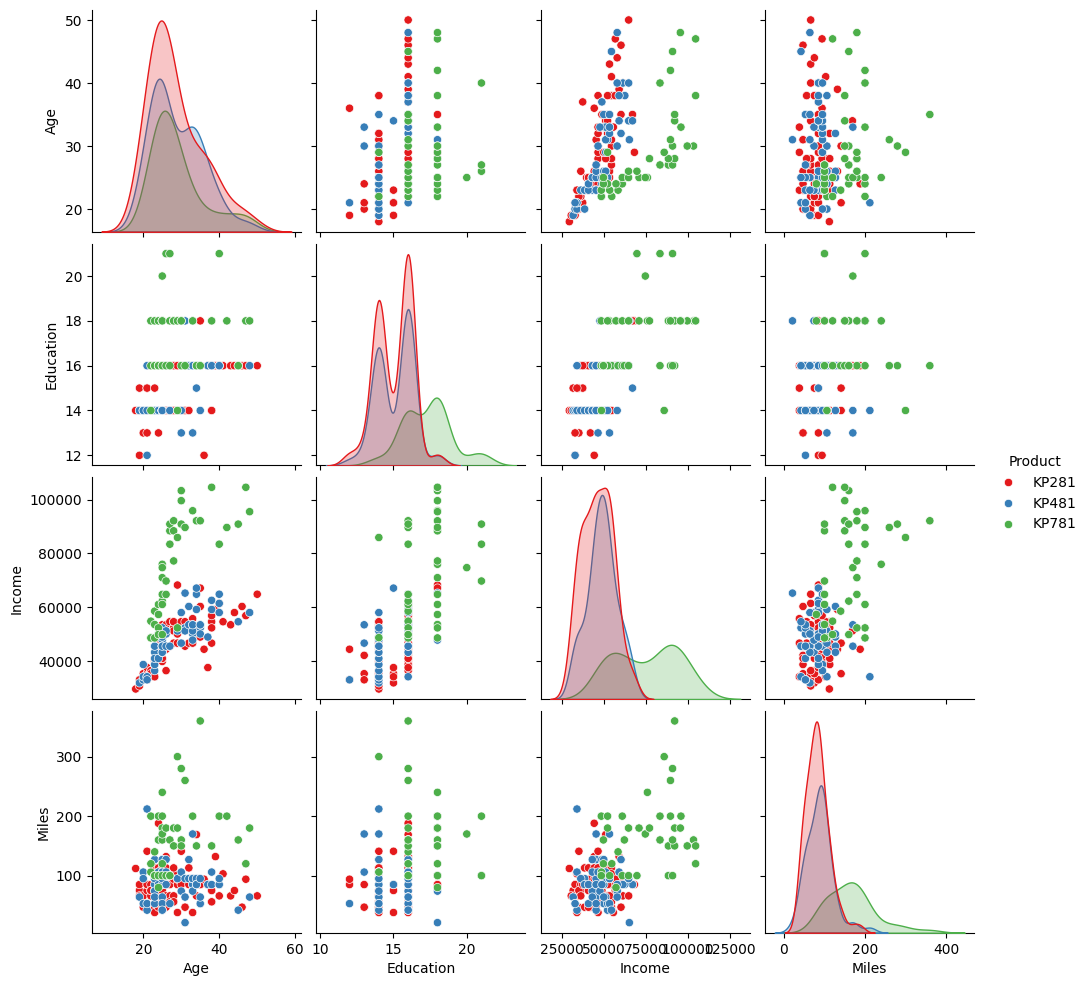

In [ ]:
sns.pairplot(df_copy, hue ='Product', palette= 'Set1')
plt.show()

In [ ]:
# First we need to convert object into int datatype for usage and fitness columns
df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  income_group   180 non-null    category
 12  miles_group    180 non-null    category
dtypes: category(4), int64(6), object(3)
memory usage: 14.2+ KB


<ipython-input-82-ff7346668eb9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_copy.corr()


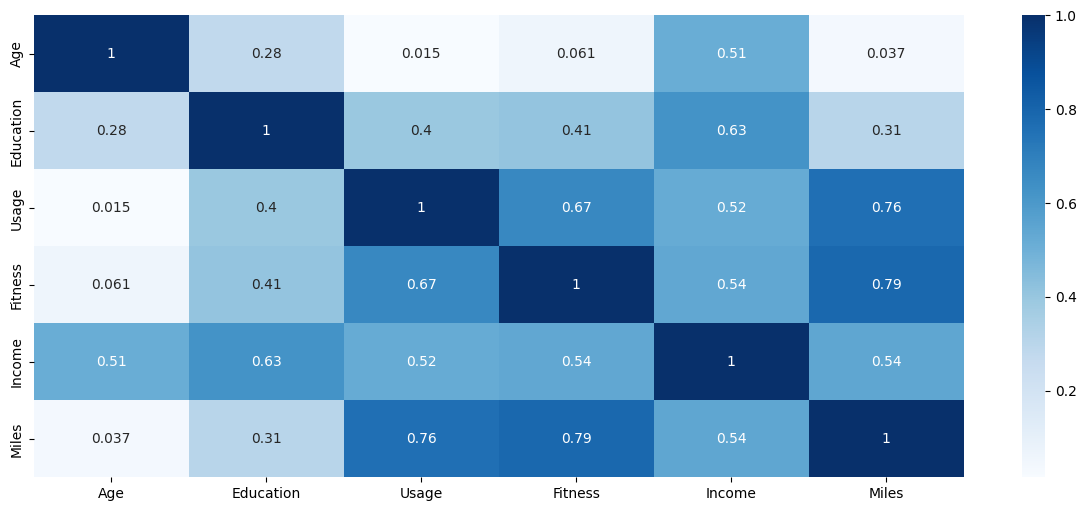

In [ ]:
corr_mat = df_copy.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_mat,annot = True, cmap="Blues")
plt.show()

From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them

Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.

Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

**Probability**

In [ ]:
#Probability of product purchase to gender
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


The Probability of a treadmill being purchased by a female is 42%.

The Probability of a treadmill being purchased by a male is 58%.

In [ ]:
#Probability of product purchase c Age
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

The Probability of a treadmill being purchased by a Adult(26-35) is 41%

The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%

The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%

In [ ]:
#Probability of product purchase with respect to Income
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.

The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

In [ ]:
#Probability of product purchase with respect to Customer Fitness
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%

The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.

The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

In [ ]:
#Probability of product purchase with respect to Marital Status
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


The Probability of a treadmill being purchased by a Married Customer is 59%.

The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

In [ ]:
#Probability of product purchase with respect to Weekly Usage
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.


The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.


The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.


In [ ]:
#Probability of product purchase with respect to weekly mileage
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

**Recommendations**

**Recommendations for Marketing for KP781:**

Targeted Strategies for Female Customers: With only 18% of total sales attributed to female customers, implementing targeted strategies tailored to this demographic can significantly enhance sales. Consider offering special promotions and trials exclusively designed for female customers to increase their engagement and interest in the KP781 model.
Recommendations for Affordable Pricing and Payment Plans:

Affordable Pricing for KP281 and KP481 Treadmill: To cater to the target customer's demographics, including age, education level, and income, it's essential to price the KP281 and KP481 Treadmill models affordably. This can make the treadmills more accessible to a wider range of customers.

Flexible Payment Plans: Providing flexible payment plans that allow customers to spread the cost of the treadmill over several months can further enhance accessibility. This approach accommodates customers with varying budgets and encourages more people to invest in the KP281 and KP481 models.

**Recommendations for User-Friendly App Integration:**

Develop a User-Friendly App: Create an intuitive and user-friendly app that seamlessly integrates with the treadmill. The app should track users' weekly running mileage, offer real-time feedback on their progress, and provide personalized workout recommendations based on their fitness scale and goals.

Enhance User Experience and Engagement: The app's features can significantly enhance the overall treadmill experience, keeping users engaged and motivated to achieve their fitness goals. By providing valuable insights and guidance, the app becomes an essential companion for users, encouraging consistent usage of the treadmill.